In [1]:
#import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#pobieram dane
url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

col = ['edibility','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
       'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
       'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
       'veil-color','ring-number','ring-type','spore-print-color','population','habitat']
dane01_org = pd.read_csv(url,header=None,names=col)
print(dane01_org.info())
for c in col:
    print(dane01_org[c].value_counts())
dane01_corrected = dane01_org.replace({'?':'n'})
print(dane01_org.isna().sum())
dane01_corrected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
def triheatmap(dane,size):
    dane_corr = dane.corr()
    mask= np.triu(dane_corr)
    colorm = sns.diverging_palette(h_neg=150,h_pos=50,s=100,l=70,sep=2,as_cmap=True)
    plt.figure(figsize=(size, size), dpi = 120)
    sns.heatmap(dane_corr.astype('float64'),mask=mask,square=True,cmap=colorm,center=0.00)

In [4]:
from sklearn import preprocessing
#poprawiam i zakodowuje dane
dane01_ppLE = dane01_corrected.copy()
le = preprocessing.LabelEncoder()
for c in dane01_org.columns:
    dane01_ppLE[c] = le.fit_transform(dane01_corrected[c])  
dane01_ppLE

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [5]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
dane = pd.get_dummies(dane01_corrected, prefix_sep="_")
dane.sample(10)

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7202,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3558,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7172,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3209,0,1,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
4819,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3973,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3738,0,1,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
3377,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3379,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2288,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Index(['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

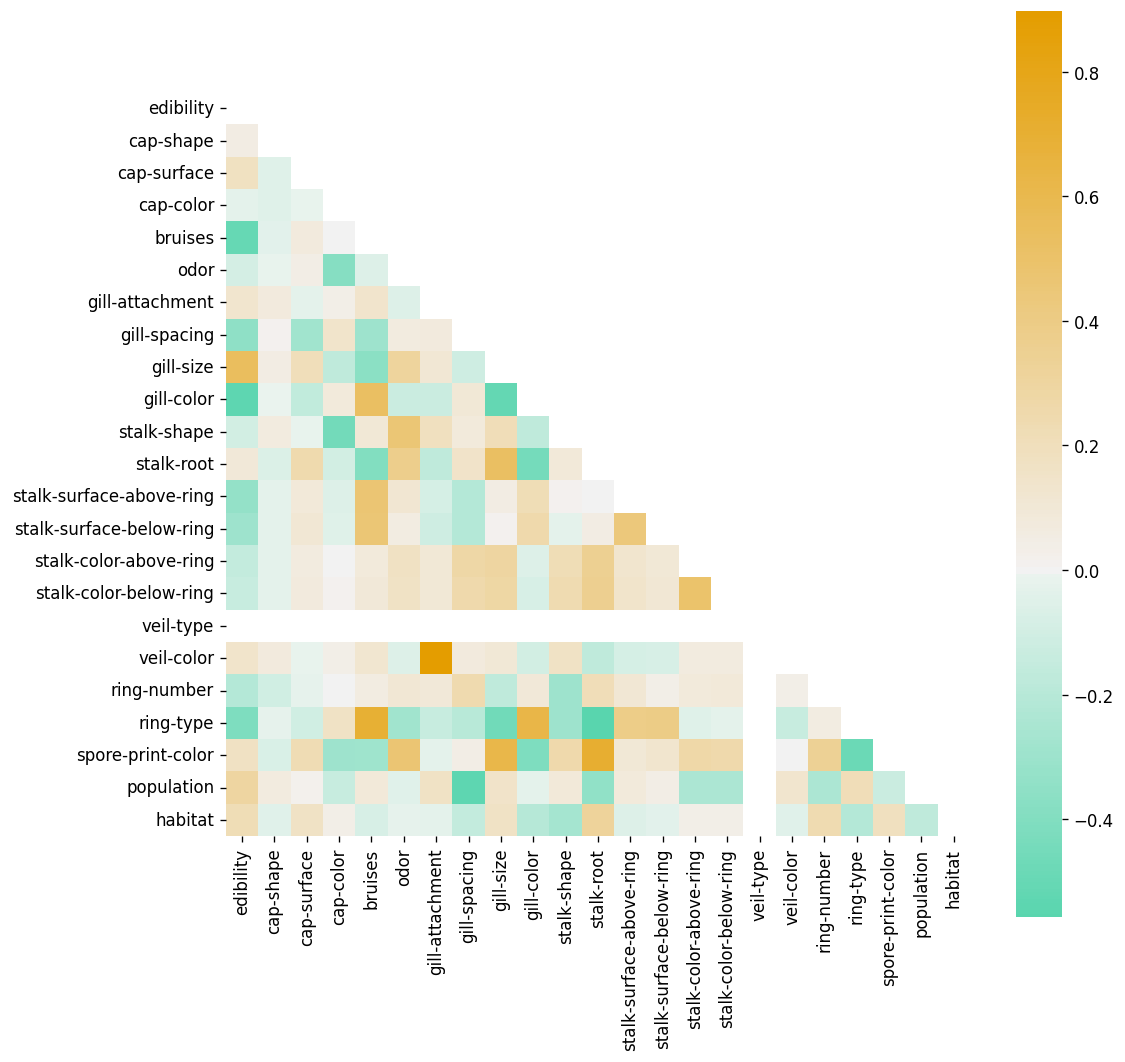

In [6]:
triheatmap(dane01_ppLE,10)
dane01_ppLE=dane01_ppLE.drop('veil-type',axis=1)
dane01_ppLE.columns

In [7]:
zbiory_czeste = apriori(dane, min_support=0.5, use_colnames=True)
reguly = association_rules(zbiory_czeste, metric="lift", min_threshold=1)
reguly[ (reguly['confidence'] >= 0.99) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(edibility_e),(veil-type_p),0.517971,1.000000,0.517971,1.0,1.000000,0.000000,inf
3,(bruises_f),(veil-type_p),0.584441,1.000000,0.584441,1.0,1.000000,0.000000,inf
6,(stalk-shape_t),(gill-attachment_f),0.567208,0.974151,0.567208,1.0,1.026535,0.014662,inf
9,(stalk-color-above-ring_w),(gill-attachment_f),0.549483,0.974151,0.549483,1.0,1.026535,0.014204,inf
10,(stalk-color-below-ring_w),(gill-attachment_f),0.539636,0.974151,0.539636,1.0,1.026535,0.013949,inf
...,...,...,...,...,...,...,...,...,...
692,"(veil-color_w, veil-type_p, stalk-surface-belo...",(gill-attachment_f),0.529788,0.974151,0.529788,1.0,1.026535,0.013695,inf
693,"(veil-color_w, ring-number_o, stalk-surface-be...",(veil-type_p),0.529788,1.000000,0.529788,1.0,1.000000,0.000000,inf
694,"(gill-attachment_f, veil-type_p, stalk-surface...",(veil-color_w),0.529788,0.975382,0.529788,1.0,1.025240,0.013043,inf
696,"(veil-color_w, ring-number_o, stalk-surface-be...","(veil-type_p, gill-attachment_f)",0.529788,0.974151,0.529788,1.0,1.026535,0.013695,inf


Wnioski
* Na podstawie analizy koszyka zakupowego możemy zauważyć, że w naszym zbiorze danych bardzo łatwo jest przewidzieć niektóre atrybuty na podstawie innego (lub pary innych). Jest to spowodowane typ, że takie atrybuty jak veil_color, gill_attachment lub ring_number mają element dominujący ilościowo. W przypadku cech, które są bardziej różnorodne np. habitat lub spore-print-color bardzo trudno jest je przewidzieć na podstawie tylko jednego lub pary atrybutów.

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
def encoderohc (dataset):
    ordenc = OrdinalEncoder()
    ohc = OneHotEncoder(drop='if_binary',categories='auto')
    #encoded dane
    c=dataset.columns
    dane01_pre= ohc.fit_transform(dataset[c]).toarray()
    dane02 = pd.DataFrame(dane01_pre,columns= ohc.get_feature_names(c))
    ohc.categories_
    return dane02

In [9]:
from sklearn.decomposition import PCA
#zmniejszam ilosc wymiarow 
def redimcom(dane02,idx,f):
    ldane02 = dane02.shape[1]
    l_variability_eq_idx = ldane02
    pca_f = PCA(n_components=ldane02,random_state = 460)
    pca_f.fit(dane02)
    if(f==1):
        print("pca_f.explained_variance_ratio_")
        print(np.cumsum(pca_f.explained_variance_ratio_))
        sns.lineplot(data=np.cumsum(pca_f.explained_variance_ratio_)).set_title("sum pca_f.explained_variance_ratio_")
    pca_idxvar =  PCA(n_components=idx,random_state = 460)
    dane02_pca_idxvar = pca_idxvar.fit_transform(dane02)
    if(f!=0):
        print("wymiary po redukcji")
        print(dane02_pca_idxvar.shape)
    dane02_postprepro = pd.DataFrame(dane02_pca_idxvar)
    return dane02_postprepro

In [10]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
import math

def classification (ldane,desl,tdane,dest,f):
    kk = int(math.sqrt(ldane.shape[0]))
    classifiers = []
    modelnc = NearestCentroid()
    classifiers.append((0,"NearestCentroid",modelnc))
    modelgnb = GaussianNB()
    classifiers.append((1,"GaussianNB",modelgnb))
    modelrf = RandomForestClassifier(n_estimators=100, random_state=42)
    classifiers.append((2,"RandomForestClassifier",modelrf))
    modelknsq = KNeighborsClassifier(n_neighbors=kk)
    classifiers.append((3,"KNeighborsClassifier sqrt",modelknsq))
    for k in range(1,20,4):
        modelkn1 = KNeighborsClassifier(n_neighbors=k)
        classifiers.append((3+math.floor(k/4),"KNeighborsClassifier %s"%k,modelkn1))
    for k in range(2,13,2):
        modeldtc = tree.DecisionTreeClassifier(max_depth=k)
        classifiers.append((2+math.floor(k/2)+8,"DecisionTreeClassifier %s"%k,modeldtc))
    
    lscores_list = []
    tscores_list = []
    name_list = []
    
    for j,name,classif in classifiers: 
        classif.fit(ldane,desl)
        t_pred = classif.predict(tdane)
        l_pred = classif.predict(ldane)
        # 
        tscores_list.append(metrics.accuracy_score(dest,t_pred))
        lscores_list.append(metrics.accuracy_score(desl,l_pred))
        name_list.append(name)
        #
        if(f==1):
            print(name)
            lscores = metrics.accuracy_score(desl,l_pred)
            tscores = metrics.accuracy_score(dest,t_pred)
            tresult = metrics.confusion_matrix(dest, t_pred)
            lresult = metrics.confusion_matrix(desl, l_pred)
            #
            print("test set: ")
            print("confusion_matrix: ")
            print(tresult)
            print("accuracy_score: ")
            print(tscores)
            print("learning set: ")
            print("confusion_matrix: ")
            print(lresult)
            print("accuracy_score: ")
            print(lscores)
            print("\n")
        #   
    return lscores_list,tscores_list,name_list

In [11]:
def score_vis(lscores_list,tscores_list,name_list):
    plt.figure(figsize=(7,6))
    plt.plot(lscores_list,label = "learning set")
    plt.plot(tscores_list,label = "testing set")
    plt.xticks(np.arange(len(name_list)),name_list,rotation = 'vertical')
    plt.title("metrics.accuracy_score ")
    plt.subplots_adjust(bottom = 0.1)
    plt.margins(0.2)
    plt.legend()
    plt.show()

In [12]:
def score_vis2(lscores_list,tscores_list,name_list,train_list,test_list):
    plt.figure(figsize=(7,6))
    plt.plot(lscores_list,label = "PCA learning set")
    plt.plot(tscores_list,label = "PCA testing set")
    plt.plot(train_list,label = "standard learning set")
    plt.plot(test_list,label = "standard testing set")
    plt.xticks(np.arange(len(name_list)),name_list,rotation = 'vertical')
    plt.title("metrics.accuracy_score")
    plt.subplots_adjust(bottom = 0.1)
    plt.margins(0.2)
    plt.legend()
    plt.show()

In [13]:
def score_vis3(vis):
    i_max = len(vis)
    j_max = len(vis[0])
    fig, axs = plt.subplots(i_max, j_max,sharex=True,sharey=True,figsize=(15,15))
    i = 0
    for v in vis:
        j = 0
        for lscores_list,tscores_list,name_list,g,prop in v:
            axs[i, j].plot(lscores_list,label = "learning set")
            axs[i, j].plot(tscores_list,label = "testing set")
            axs[i, j].set_xticks(np.arange(len(name_list)),minor=False)
            axs[i, j].set_xticklabels(name_list, rotation=90)
            axs[i, j].set_title("Var:%s Prop:%s"%(g,prop))
            j=j+1
        i= i+1

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
def predictatr (zmienna,prop):#pelen opis pojedynczej zmiennej
    dane01 = dane01_ppLE.loc[:,dane01_ppLE.columns != zmienna ] 
    des = dane01_ppLE[zmienna] #oddziel kolumne ze zmienna
    dane02 = encoderohc(dane01) #uzyj OneHotEncoder
    des02 = pd.get_dummies(des, prefix_sep="_")
    print("wielkosc danych przed redukcja:" )
    print(dane02.shape)
    for i in range(0,des02.shape[1]):
        print("Wartość atrubbutu")
        print(des02[i].value_counts())
        dane02_postprepro = redimcom(dane02,0.95,0) # zredukuj wymiary przy pomocy principal component analysis
        ldane03,tdane03,desl3,dest3 = train_test_split(dane02_postprepro,des02[i],test_size =prop,random_state=460, shuffle=True) # podziel dane na test and learn 
        lscores_list,tscores_list,name_list = classification(ldane03,desl3,tdane03,dest3,0) # przeprowadź klasyfikacje zarowno danych testowych i uczacych
        score_vis(lscores_list,tscores_list,name_list)# wizualizacja 

In [16]:
def predictatr2 ():#porownanie 
    zmienna = 'edibility'
    prop = 0.3
    dane01 = dane01_ppLE.loc[:,dane01_ppLE.columns != zmienna ] 
    des = dane01_ppLE[zmienna] #oddziel kolumne ze zmienna
    dane02 = encoderohc(dane01) #uzyj OneHotEncoder
    print("wielkosc danych przed redukcja:" )
    print(dane02.shape)
    y = dane01_ppLE["edibility"].values
    x = dane01_ppLE.drop(["edibility"], axis=1).values
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=460,test_size=0.3)
    train_list,test_list,names = classification(x_train,y_train,x_test,y_test,0)
    dane02_postprepro = redimcom(dane02,0.95,2) # zredukuj wymiary przy pomocy principal component analysis
    ldane03,tdane03,desl3,dest3 = train_test_split(dane02_postprepro,des,test_size =prop,random_state=460, shuffle=True) # podziel dane na test and learn 
    lscores_list,tscores_list,name_list = classification(ldane03,desl3,tdane03,dest3,0) # przeprowadź klasyfikacje zarowno danych testowych i uczacych
    score_vis2(lscores_list,tscores_list,name_list,train_list,test_list)# wizualizacja

In [17]:
def predictatr3 (zmienna):
    dane01 = dane01_ppLE.loc[:,dane01_ppLE.columns != zmienna ] 
    des = dane01_ppLE[zmienna] #oddziel kolumne ze zmienna
    dane02 = encoderohc(dane01) #uzyj OneHotEncoder
    vis = []
    print("metrics.accuracy_score ")
    print("PCA learning set - blue")
    print("PCA testing set - orange")
    print()
    for g in range(70,96,5):
        vis_prop = []
        for prop in range (25,36,5):
            dane02_postprepro = redimcom(dane02,g/100,0) # zredukuj wymiary przy pomocy principal component analysis
            ldane03,tdane03,desl3,dest3 = train_test_split(dane02_postprepro,des,test_size =prop/100,random_state=460, shuffle=True) # podziel dane na test and learn 
            lscores_list,tscores_list,name_list = classification(ldane03,desl3,tdane03,dest3,0) # przeprowadź klasyfikacje zarowno danych testowych i uczacych
            vis_prop.append((lscores_list,tscores_list,name_list,g,prop))
        vis.append(vis_prop)
    score_vis3(vis) # wizualizacja 

Wnioski
* Poszczególne wartości atrybutów są przekodowane na wartości liczbowe. Wartość poszukiwana jest odseparowywana. Następnie w celu uniknięcia w dalszej części postawienia między nimi znaków < >. Używam OneHotEncoder by podobnie jak w przypadku użycia get_dummies wy separować poszczególne wartości do nowych kolumn z wyjątkiem wystąpienia dwóch wartości wtedy nie są one separowane w celu minimalizacji znacząco powiększonej ilości kolumn. Następnie wykorzystując PCA (Principal component analysis) zmniejszamy ilość atrybutów tak by rozpiętość danych pozostała na wskazanym zmienną poziomie. 
* Dane są dzielone w stosunku wedle wskazanej wartości na zbiór testowy i treningowy (uczący). Ma to na celu ostateczne ich przygotowanie do fazy uczenia. Podstawiamy dane do kolejnych klasyfikatorów i dla otrzymanych wyników z obu zbirów obliczamy accuracy_score.  

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


wielkosc danych przed redukcja:
(8124, 103)
Wartość atrubbutu
0    8076
1      48
Name: 0, dtype: int64


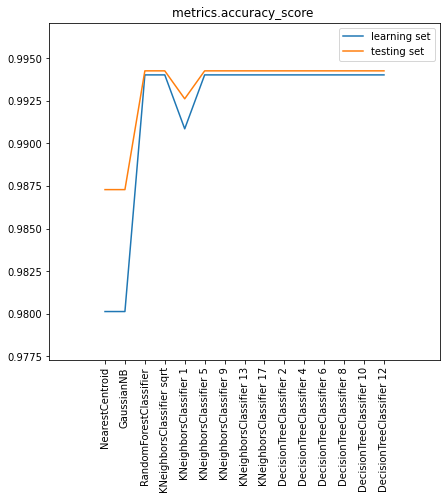

Wartość atrubbutu
0    6492
1    1632
Name: 1, dtype: int64


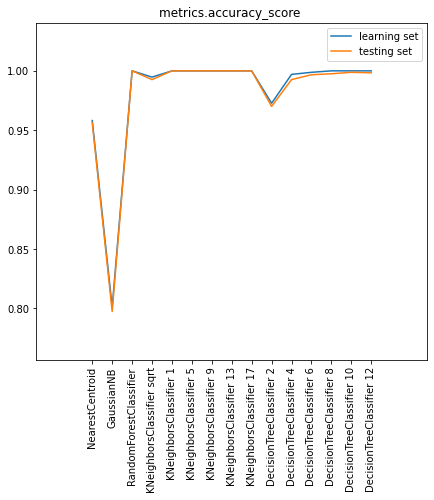

Wartość atrubbutu
0    6252
1    1872
Name: 2, dtype: int64


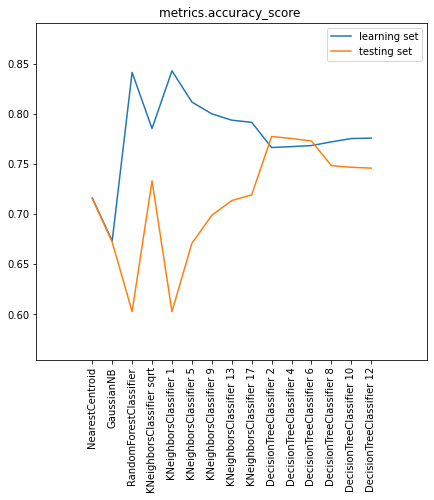

Wartość atrubbutu
0    6156
1    1968
Name: 3, dtype: int64


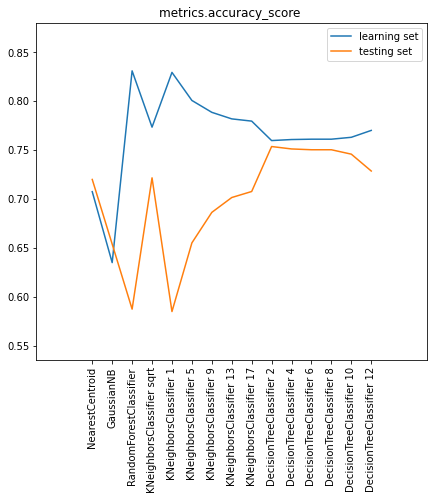

Wartość atrubbutu
0    8076
1      48
Name: 4, dtype: int64


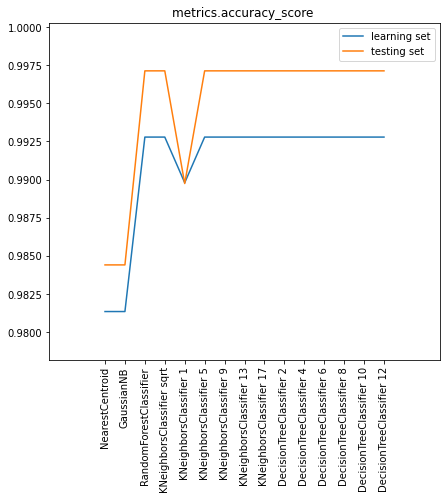

Wartość atrubbutu
0    8052
1      72
Name: 5, dtype: int64


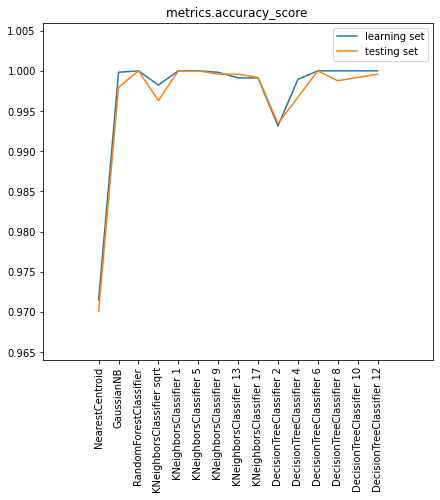

Wartość atrubbutu
0    8076
1      48
Name: 6, dtype: int64


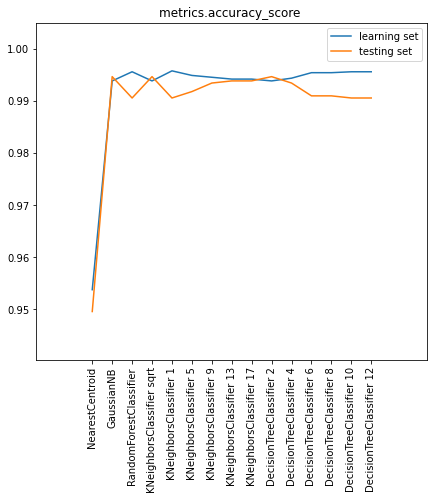

Wartość atrubbutu
0    5736
1    2388
Name: 7, dtype: int64


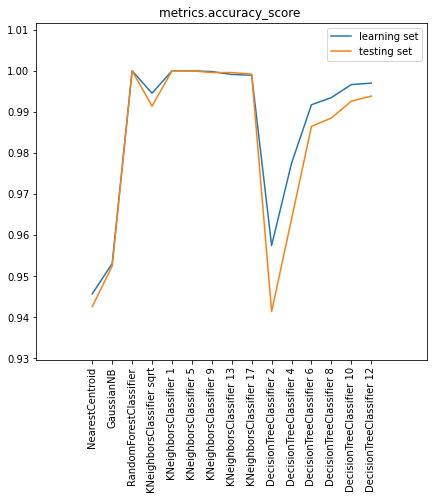

Wartość atrubbutu
0    8076
1      48
Name: 8, dtype: int64


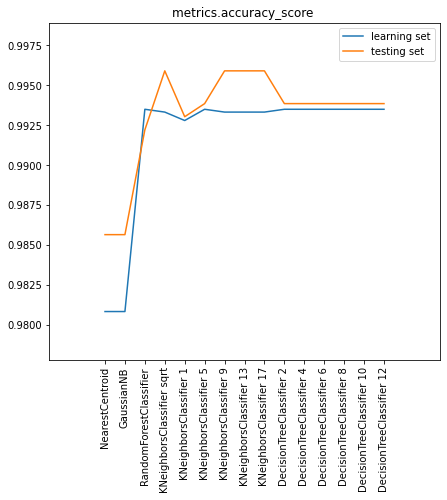

In [18]:
predictatr('spore-print-color',0.3)

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


wielkosc danych przed redukcja:
(8124, 111)
wymiary po redukcji
(8124, 41)


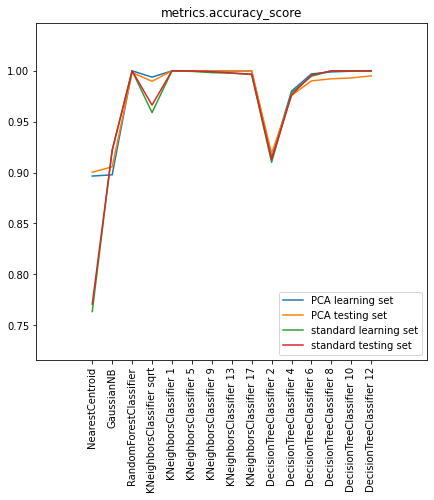

In [19]:
predictatr2()

Wnioski
* Pozyskane dane są przedstawiane w formie grafu i porównywane są wyniki uzyskane z pomocą PCA i OHE do tych, gdzie wykorzystano get_dummies bez redukcji wymiarowości. Jak można zaobserwować pierwsze rozwiązanie uzyskuje podobne wyniki dla GaussianNB RandomForestClassifier oraz KNN dla k od 1 do ok 13 oraz DecisionTreeClassifier 2 - 4 oraz dużo lepsze dla NearestCentroid, KNN dla k = sqrt(liczby obiektów w zbiorze uczącym). Drugie podejście pozwala na otrzymanie lepszych wyników dla zestawu uczącego i DecisionTreeClassifier 6 -. 

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


metrics.accuracy_score 
PCA learning set - blue
PCA testing set - orange



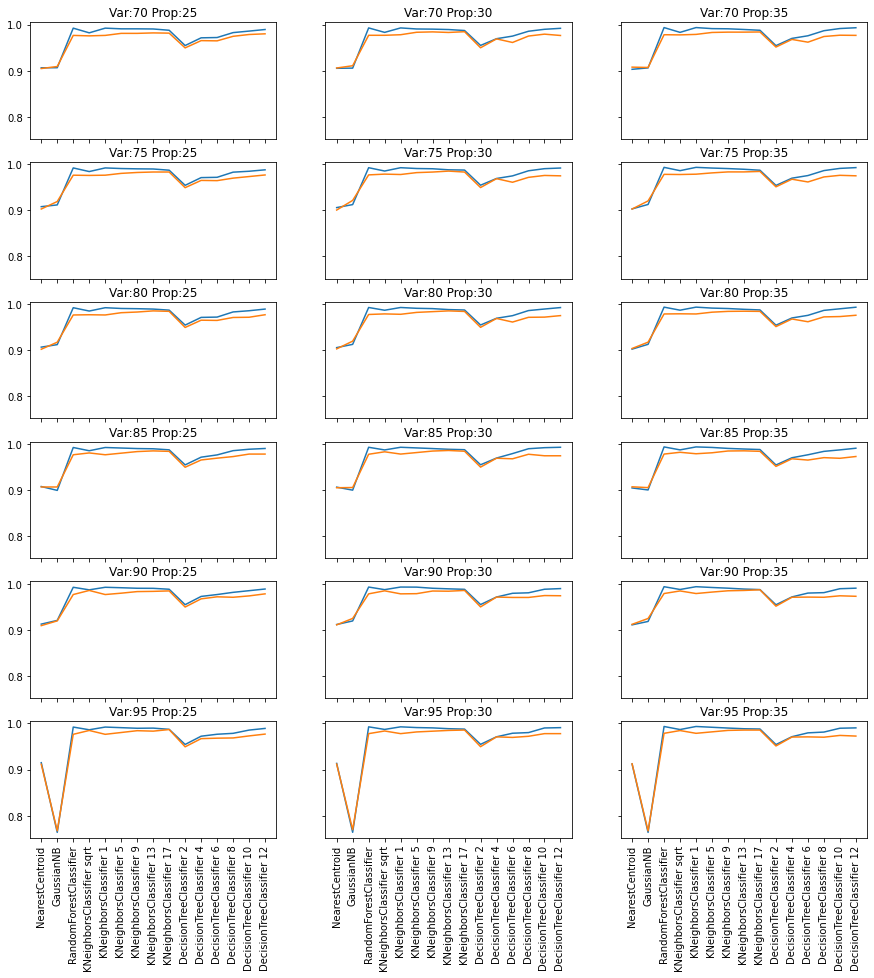

In [20]:
predictatr3('gill-spacing')#zajmuje ok 2-5min 

Wnioski
* Zmiana proporcji podziału danych zadaje się minimalnie wpływać na wynik dla wyższych wartości obniżając wynik zbioru testowego dla DecisionTreeClassifier 6 -. Zmiana wartości zmienności na wyższą powoduje pogorszenie się rezultatów metody GaussianNB podczas gdy pozostałe metody dały minimalnie lepsze wyniki co jest lepiej widoczne w przypadku zbioru testowego. 

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def conf_mat(y_test, model):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    x_axis_labels = ["Edible", "Poisonous"]
    y_axis_labels = ["Edible", "Poisonous"]
    f, ax = plt.subplots(figsize =(7,7))
    sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.title('Confusion Matrix');
    plt.show()
    
def bledy(model,x_train,y_train,x_test,y_test):
    y_pred_train = model.predict(x_train)
    e_train = metrics.mean_squared_error(y_train, y_pred_train)
    y_pred_test = model.predict(x_test)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)

    print('Błąd uczenia: ',e_train)
    print('Błąd generalizacji: ',e_test)

In [22]:
y = dane01_ppLE["edibility"].values

x = dane01_ppLE.drop(["edibility"], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

Train Nearest Centroid Accuracy: 76.55%
Test Nearest Centroid Accuracy: 77.05%
Błąd uczenia:  0.23449761501769503
Błąd generalizacji:  0.22953846153846155


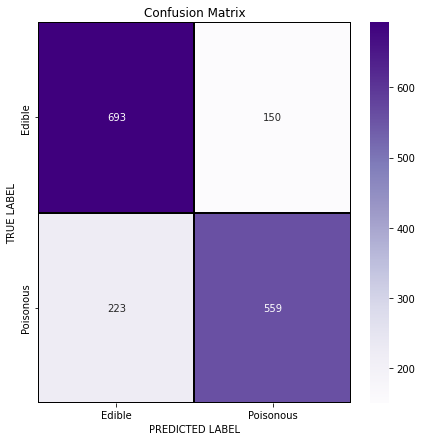

In [23]:
model = NearestCentroid()
model.fit(x_train, y_train)
print("Train Nearest Centroid Accuracy: {}%".format(round(model.score(x_train,y_train)*100,2)))
print("Test Nearest Centroid Accuracy: {}%".format(round(model.score(x_test,y_test)*100,2)))

bledy(model,x_train,y_train,x_test,y_test)

conf_mat(y_test,model)

Train Naive Bayes Accuracy: 92.11%
Test Naive Bayes Accuracy: 92.74%
Błąd uczenia:  0.07893522080320049
Błąd generalizacji:  0.07261538461538461


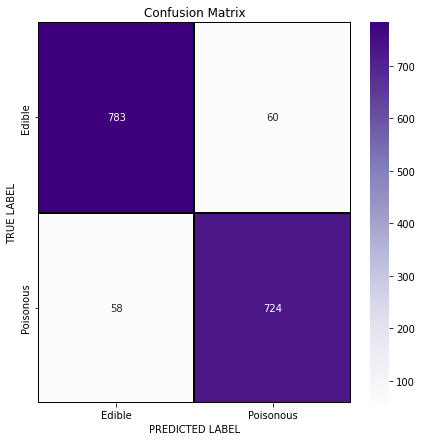

In [24]:
model = GaussianNB()
model.fit(x_train, y_train)
print("Train Naive Bayes Accuracy: {}%".format(round(model.score(x_train,y_train)*100,2)))
print("Test Naive Bayes Accuracy: {}%".format(round(model.score(x_test,y_test)*100,2)))

bledy(model,x_train,y_train,x_test,y_test)

conf_mat(y_test,model)


In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
print("Train Accuracy: {}%".format(round(model.score(x_train,y_train)*100,2)))
print("Test Accuracy: {}%".format(round(model.score(x_test,y_test)*100,2)))

bledy(model,x_train,y_train,x_test,y_test)

Train Accuracy: 100.0%
Test Accuracy: 100.0%
Błąd uczenia:  0.0
Błąd generalizacji:  0.0


In [26]:
kk = int(math.sqrt(dane01_ppLE.shape[0]))
model = KNeighborsClassifier(n_neighbors=kk)
model.fit(x_train,y_train)
print("\nTrain SQRT-NN Accuracy: {}%".format(round(model.score(x_train,y_train)*100,2)))
print("Test SQRT-NN Accuracy: {}%".format(round(model.score(x_test,y_test)*100,2)))


Train SQRT-NN Accuracy: 95.95%
Test SQRT-NN Accuracy: 95.2%


In [27]:
for i in range(1,20,4):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    print("\nTrain " + str(i) + "-NN Accuracy: {}%".format(round(model.score(x_train,y_train)*100,2)))
    print("Test " + str(i) + "-NN Accuracy: {}%".format(round(model.score(x_test,y_test)*100,2)))
    
    bledy(model,x_train,y_train,x_test,y_test)


Train 1-NN Accuracy: 100.0%
Test 1-NN Accuracy: 99.94%
Błąd uczenia:  0.0
Błąd generalizacji:  0.0006153846153846154

Train 5-NN Accuracy: 99.97%
Test 5-NN Accuracy: 99.57%
Błąd uczenia:  0.00030773965225419295
Błąd generalizacji:  0.0043076923076923075

Train 9-NN Accuracy: 99.82%
Test 9-NN Accuracy: 99.63%
Błąd uczenia:  0.0018464379135251577
Błąd generalizacji:  0.0036923076923076922

Train 13-NN Accuracy: 99.77%
Test 13-NN Accuracy: 99.69%
Błąd uczenia:  0.002308047391906447
Błąd generalizacji:  0.003076923076923077

Train 17-NN Accuracy: 99.66%
Test 17-NN Accuracy: 99.45%
Błąd uczenia:  0.0033851361747961224
Błąd generalizacji:  0.005538461538461538


In [28]:
for i in range(1,20,4):
    model = tree.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    print("\nTrain Decision Tree with depth " + str(i) + " Accuracy: {}%".format(round(model.score(x_train,y_train)*100,2)))
    print("Test Decision Tree with depth " + str(i) + " Accuracy: {}%".format(round(model.score(x_test,y_test)*100,2)))
    
    bledy(model,x_train,y_train,x_test,y_test)


Train Decision Tree with depth 1 Accuracy: 78.83%
Test Decision Tree with depth 1 Accuracy: 79.82%
Błąd uczenia:  0.21172488075088475
Błąd generalizacji:  0.20184615384615384

Train Decision Tree with depth 5 Accuracy: 98.0%
Test Decision Tree with depth 5 Accuracy: 97.66%
Błąd uczenia:  0.02000307739652254
Błąd generalizacji:  0.023384615384615386

Train Decision Tree with depth 9 Accuracy: 100.0%
Test Decision Tree with depth 9 Accuracy: 100.0%
Błąd uczenia:  0.0
Błąd generalizacji:  0.0

Train Decision Tree with depth 13 Accuracy: 100.0%
Test Decision Tree with depth 13 Accuracy: 100.0%
Błąd uczenia:  0.0
Błąd generalizacji:  0.0

Train Decision Tree with depth 17 Accuracy: 100.0%
Test Decision Tree with depth 17 Accuracy: 100.0%
Błąd uczenia:  0.0
Błąd generalizacji:  0.0


Wnioski
*  Na podstawie wyników klasyfikacji możemy zauważyć, że prawie dla wszystkich klasyfikatorów dokładność zarówno zbioru uczącego jak i testowego była bardzo wysoka. Wyjątkiem jest tutaj metoda najbliższych centroidów z dokładnością ok. 77% dla obu zbiorów. Natomiast RandomForestClassifier oraz DecisionTreeClassifier (dla głębokości >=7) dokładność wynosi 100% dla obu zbiorów.